In [39]:
# import the necessary packages
import imutils
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils.perspective import four_point_transform
from imutils import contours

In [40]:
#image = cv2.imread('Dataset/LQ_digital/12f3b49b495578fc3faae1bb7dc9905affd92ed4.jpg')
#image = cv2.imread('Dataset/MQ_digital/20f60c2f39dec9946c339755d0da6408ba16ac18.jpg')
image = cv2.imread('Dataset/LQ_digital/1b6948b086f001d12a153572606f78744c006c24.jpg')
#image = cv2.imread('Dataset/HQ_digital/86f374d068c3526c462b47a55dc2f7cbffe34521.jpg')
#image = cv2.imread('Dataset/LQ_digital/040fe5eaa0e1767fcc14a08aa1fd32334bb480a4.jpg')
#image = cv2.imread('game.jpg')

ratio = image.shape[0] / 300.0
orig = image.copy()
image = imutils.resize(image, height = 300)

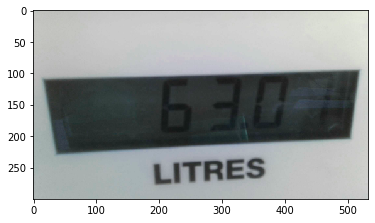

In [41]:
plt.imshow(image)

In [42]:
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)

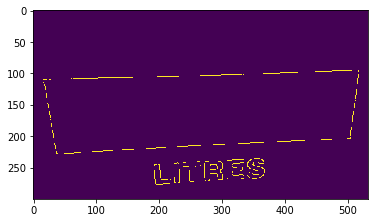

In [43]:
plt.imshow(edged)

In [44]:
# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None


In [45]:
cnts_zer = []
for c in cnts : 
    (x,y,w,h) = cv2.boundingRect(c)
    print(w,h)
    if w>200 : 
        cnts_zer.append(c)

30 33
28 32
29 33
30 33
28 33
10 33
503 134


In [46]:
type(c)

numpy.ndarray

In [47]:
rect = cv2.minAreaRect(cnts_zer[0])
box = cv2.boxPoints(rect)

In [48]:
box

array([[ 19.279816, 228.85614 ],
       [ 15.832306, 109.177666],
       [517.9054  ,  94.71466 ],
       [521.3529  , 214.39313 ]], dtype=float32)

In [49]:
# loop over our contours
for c in cnts_zer:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)

    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [50]:
type(screenCnt)

NoneType

In [51]:
approx

array([[[518,  98]],

       [[ 16, 110]],

       [[518,  98]],

       [[504, 203]],

       [[ 49, 228]],

       [[ 16, 115]],

       [[ 49, 228]],

       [[505, 203]]], dtype=int32)

In [52]:
box

array([[ 19.279816, 228.85614 ],
       [ 15.832306, 109.177666],
       [517.9054  ,  94.71466 ],
       [521.3529  , 214.39313 ]], dtype=float32)

In [53]:
boxazz = box.astype(np.int32)
boxazz

array([[ 19, 228],
       [ 15, 109],
       [517,  94],
       [521, 214]], dtype=int32)

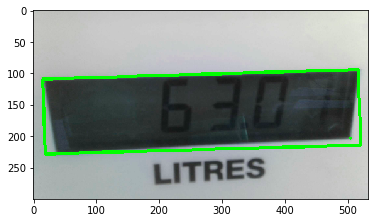

In [55]:
# draw a rectangle around the screen
orig = image.copy()
cv2.drawContours(image, [boxazz], -1, (0, 255, 0), 3)
plt.imshow(image)

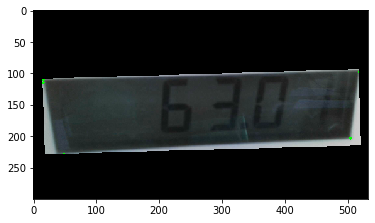

In [64]:
# create a mask for the screen
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.drawContours(mask, [boxazz], -1, 255, -1)
result = cv2.bitwise_and(orig, orig, mask = mask)
plt.imshow(result)

In [65]:
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 30, 200)

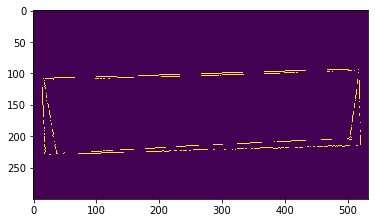

In [66]:
plt.imshow(edged)

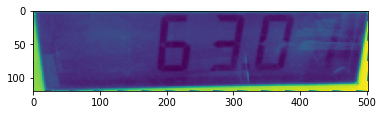

In [67]:
warped = four_point_transform(gray, boxazz.reshape(4, 2))
output = four_point_transform(image, boxazz.reshape(4, 2))
plt.imshow(warped)

In [68]:
img = cv2.medianBlur(warped,5)
#img = cv2.medianBlur(gray,5)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

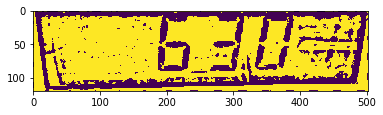

In [69]:
plt.imshow(th2)